# Загрузка необходимых библиотек

In [76]:
import librosa
import pandas as pd
import numpy as np
import librosa.display
import math
import os
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Формирование обучающей и тестовой выборки
## Создание датафрейма

In [77]:
dict1 = []
for i in range(70):
    dict1.append('Anton')
for i in range (70):
    dict1.append('Ivan')
for i in range (70):
    dict1.append('Olga')    
for i in range (70):
    dict1.append('Sasha')
dict1

['Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Anton',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'Ivan',
 'I

In [78]:
dict2 = os.scandir("records_wav/")
dict2

In [79]:
dict4 = []
for x in dict2:
    dict4.append(str(x.path))
dict4

['records_wav/Anton_1.wav',
 'records_wav/Anton_10.wav',
 'records_wav/Anton_2.wav',
 'records_wav/Anton_3.wav',
 'records_wav/Anton_4.wav',
 'records_wav/Anton_5.wav',
 'records_wav/Anton_6.wav',
 'records_wav/Anton_7.wav',
 'records_wav/Anton_8.wav',
 'records_wav/Anton_9.wav',
 'records_wav/Anton_balcony.wav',
 'records_wav/Anton_basement.wav',
 'records_wav/Anton_bathroom.wav',
 'records_wav/Anton_bed.wav',
 'records_wav/Anton_bedroom.wav',
 'records_wav/Anton_bulb.wav',
 'records_wav/Anton_car.wav',
 'records_wav/Anton_ceiling.wav',
 'records_wav/Anton_chandelier.wav',
 'records_wav/Anton_cleaning.wav',
 'records_wav/Anton_clock.wav',
 'records_wav/Anton_close.wav',
 'records_wav/Anton_computer.wav',
 'records_wav/Anton_conditioner.wav',
 'records_wav/Anton_console.wav',
 'records_wav/Anton_cupboard.wav',
 'records_wav/Anton_curtains.wav',
 'records_wav/Anton_door.wav',
 'records_wav/Anton_flat.wav',
 'records_wav/Anton_floor.wav',
 'records_wav/Anton_food.wav',
 'records_wav/Anto

In [80]:
dict3 = [i for i in range(280)]
dict3

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [81]:
d = {"Voice":pd.Series(dict1, index=dict3),
     "File_name":pd.Series(dict4, index=dict3)}
df = pd.DataFrame(d)

## Преобразование аудиофайлов в набор мелкепстральных коэффициентов и добавление их в датафрейм

In [82]:
i = 0
for index,File_name in enumerate(df.File_name):
    X, sample_rate = librosa.load(File_name, duration=2)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20), axis=0)
    for x in range(len(mfccs)):
        df.loc[i,x] = mfccs[x]
    i=i+1

## Проверка данных в датафрейме

In [106]:
df.iloc[250:]

,Voice,File_name,0,1,2,3,4,5,6,7,...,77,78,79,80,81,82,83,84,85,86
250,Sasha,records_wav/Sasha_keys.wav,-16.652197,-16.279068,-16.958292,-17.582737,-16.080269,-16.084650,-17.849350,-17.263609,...,-18.089069,-16.997501,-16.167610,-16.896574,-18.675531,-18.044273,-17.478039,-16.494833,-17.628033,-18.171402
251,Sasha,records_wav/Sasha_kitchen.wav,-16.021053,-14.464442,-12.651735,-11.489498,-12.687582,-14.383153,-16.107925,-15.917732,...,-16.045771,-17.682758,-15.653955,-15.385803,-15.100413,-15.724765,-16.726315,-17.673975,-16.523005,-17.221163
252,Sasha,records_wav/Sasha_light.wav,-17.188675,-13.183264,-11.951653,-15.857664,-17.287600,-17.378494,-17.838587,-18.262339,...,-16.732866,-18.017750,-18.167109,-17.444511,-18.196171,-18.807529,-18.690716,-16.843021,-13.701721,-14.198433
253,Sasha,records_wav/Sasha_lounge.wav,-13.421980,-11.395395,-11.606394,-13.611318,-13.919664,-13.556086,-14.047890,-13.149030,...,-13.621256,-14.980619,-15.948687,-17.129379,-17.391691,-19.214685,-18.182487,-16.952185,-15.975492,-16.313381
254,Sasha,records_wav/Sasha_microwave.wav,-15.690542,-13.325032,-11.922538,-13.501691,-11.825606,-11.137934,-13.663881,-14.014969,...,-7.352244,-8.805861,-11.465013,-13.584070,-14.428037,-14.956482,-15.593303,-17.410519,-17.630659,-18.938797
255,Sasha,records_wav/Sasha_music.wav,-17.087593,-14.414027,-13.333261,-13.416513,-13.909151,-15.224672,-17.474546,-18.011330,...,-17.014851,-17.244425,-17.079655,-16.719761,-15.103493,-14.805025,-16.864025,-16.775026,-15.887915,-16.022469
256,Sasha,records_wav/Sasha_off.wav,-15.585917,-12.859766,-13.171028,-14.986910,-16.070057,-17.824800,-17.671253,-17.006687,...,-18.076366,-18.085848,-18.216782,-17.527355,-17.001141,-16.972292,-17.637379,-19.592468,-18.386267,-18.237837
257,Sasha,records_wav/Sasha_on.wav,-15.638939,-13.669411,-13.295072,-14.526593,-14.723909,-16.302568,-18.334141,-17.305332,...,-17.421181,-17.700253,-18.829559,-17.733776,-16.656914,-17.974535,-17.576611,-17.151796,-16.531128,-16.531654
258,Sasha,records_wav/Sasha_open.wav,-14.479126,-13.704289,-12.957675,-13.433492,-14.808464,-15.418988,-16.386702,-16.892925,...,-16.715031,-16.462563,-16.939260,-17.479839,-18.422375,-17.869680,-16.563271,-17.181091,-17.648851,-16.611624
259,Sasha,records_wav/Sasha_phone.wav,-14.171431,-15.301537,-16.695612,-16.453325,-15.909152,-16.116640,-16.637051,-15.719648,...,-16.698948,-16.597404,-17.618061,-17.140438,-16.770300,-16.377909,-16.553349,-16.312943,-16.433176,-17.391399


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


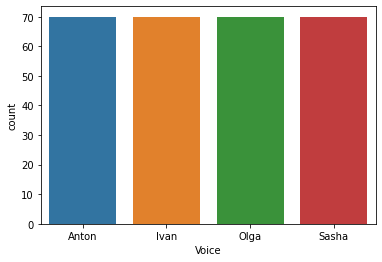

In [84]:
import seaborn as sns
sns.countplot(df['Voice']);

In [68]:
df.describe

<bound method NDFrame.describe of     Voice                        File_name          0          1          2  \
0   Anton          records_wav/Anton_1.wav -36.645866 -36.645866 -36.645866   
1   Anton         records_wav/Anton_10.wav -33.201790 -33.201790 -33.201790   
2   Anton          records_wav/Anton_2.wav -33.065765 -33.065765 -33.065765   
3   Anton          records_wav/Anton_3.wav -34.452202 -34.452202 -34.452202   
4   Anton          records_wav/Anton_4.wav -34.432148 -34.432148 -34.432148   
..    ...                              ...        ...        ...        ...   
75  Sasha     records_wav/Sasha_kettle.wav -34.722118 -34.722118 -34.722118   
76  Sasha       records_wav/Sasha_room.wav -35.008018 -35.008018 -35.008018   
77  Sasha      records_wav/Sasha_table.wav -37.707764 -37.707764 -37.707764   
78  Sasha  records_wav/Sasha_tableware.wav -37.530426 -37.530426 -37.530426   
79  Sasha     records_wav/Sasha_window.wav -36.738049 -36.738049 -36.738049   

            3    

# Разделение данных на тестовую и обучающую выборку

In [85]:
y= pd.get_dummies(df.Voice)
tr_x, test_x, tr_y, test_y= train_test_split(df.drop(["Voice","File_name"], axis=1), y,
                                    test_size=0.3, 
                                    random_state=42)

In [87]:
test_x.shape

(84, 87)

## Преобразование данных в нужный формат

In [95]:
train_data = df.drop(["Voice", "File_name"],axis = 1)
train_labels = df["Voice"]
tr_x2 = np.zeros((196,87,1))
for i in range(tr_x.shape[0]):
    for j in range(tr_x.shape[1]):
        tr_x2[i][j][0] = tr_x.iloc[i,j]
tr_x2.shape

(196, 87, 1)

In [93]:
test_x2 = np.zeros((84,87,1))
for i in range(test_x.shape[0]):
    for j in range(test_x.shape[1]):
        test_x2[i][j][0] = test_x.iloc[i,j]
test_x2.shape

(84, 87, 1)

# Создание сверточной нейронной сети

In [90]:
model = keras.Sequential()

model.add(keras.layers.Conv1D (64,2, padding = "same", activation = "relu",input_shape=(tr_x2.shape[1],1)))
model.add(keras.layers.Dropout(0.23))
model.add(keras.layers.MaxPooling1D(pool_size=4))

model.add(keras.layers.Conv1D(32,2, padding = "same", activation = "relu"))
model.add(keras.layers.Dropout(0.23))
model.add(keras.layers.MaxPooling1D(pool_size=4))

model.add(keras.layers.Conv1D(16,2, padding = "same", activation = "relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4, activation="sigmoid"))

# Обучение сети

In [96]:
mod.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
history = mod.fit(tr_x2, tr_y, validation_data=(test_x2,test_y), epochs=10,steps_per_epoch=196,validation_steps=84)

Epoch 1/10
196/196 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.2449 - val_loss: nan - val_accuracy: 0.2619
Epoch 2/10
196/196 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.2449 - val_loss: nan - val_accuracy: 0.2619
Epoch 3/10
196/196 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.2449 - val_loss: nan - val_accuracy: 0.2619
Epoch 4/10
196/196 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.2449 - val_loss: nan - val_accuracy: 0.2619
Epoch 5/10
196/196 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.2449 - val_loss: nan - val_accuracy: 0.2619
Epoch 6/10
196/196 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.2449 - val_loss: nan - val_accuracy: 0.2619
Epoch 7/10
196/196 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.2449 - val_loss: nan - val_accuracy: 0.2619
Epoch 8/10
196/196 [============================